In [20]:
import numpy as np
import matplotlib.pyplot as plt 

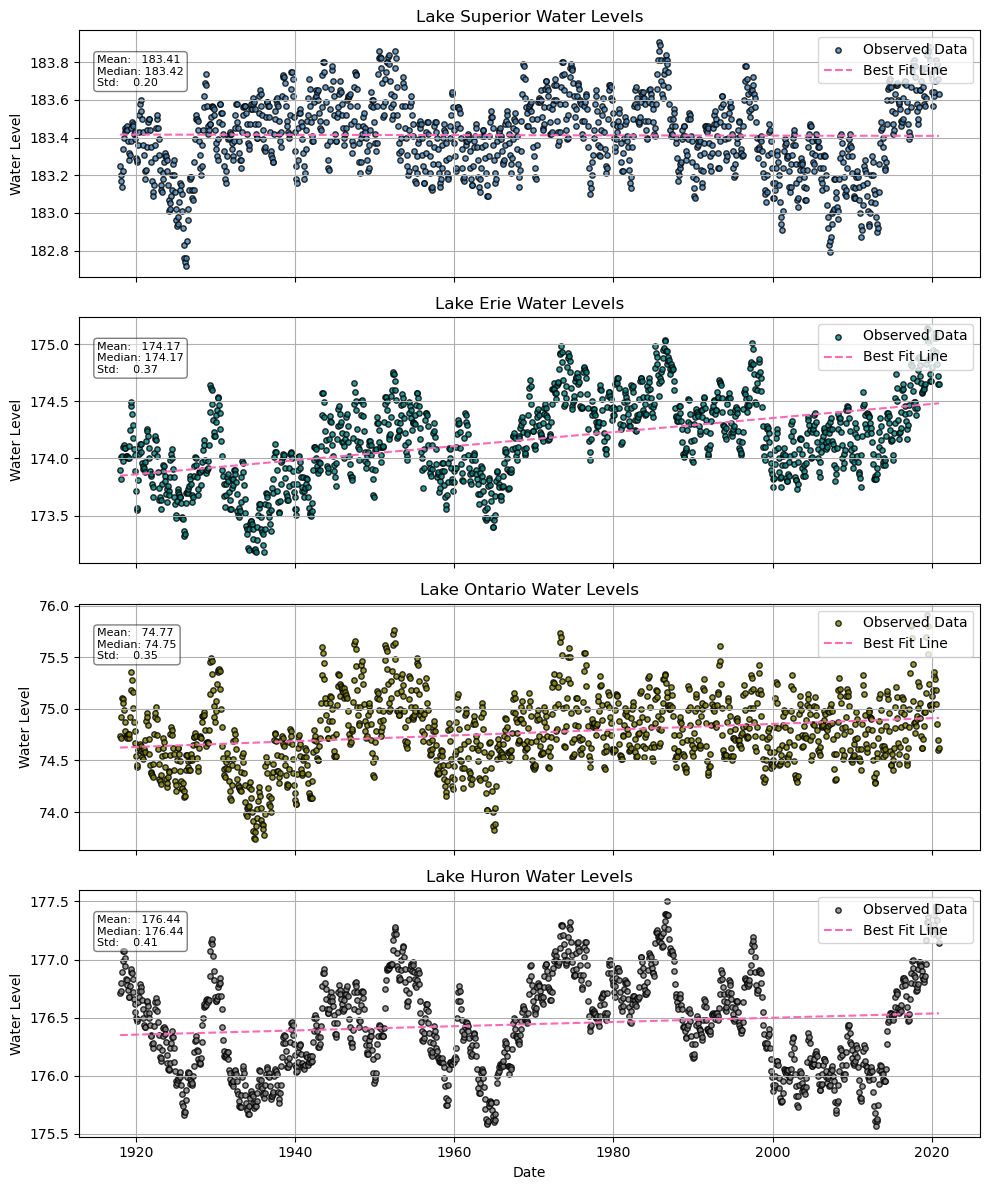

In [26]:
#lakes data and their plot colors 
lake_info = [
    ("Lake Superior", "lake_superior.csv", "steelblue"),
    ("Lake Erie",     "lake_erie.csv",     "teal"),
    ("Lake Ontario",  "lake_ontario.csv",  "olive"),
    ("Lake Huron",    "lake_michigan_huron.csv", "gray"),
]

lakes_data = []

#enters data from csv file into lake list 
for lake_name, filename, color in lake_info:
    date, level = np.loadtxt(filename, usecols=[0, 1], unpack=True, delimiter=',')
    
    mean_val = np.mean(level)
    median_val = np.median(level)
    std_val = np.std(level)

    lakes_data.append((lake_name, date, level, color, mean_val, median_val, std_val))

# Create figure with one subplot per lake
fig, axs = plt.subplots(len(lakes_data), 1, figsize=(10, 12), sharex=True)

if len(lakes_data) == 1:
    axs = [axs]
    
#scatter plot water levels vs. date for each late 
for ax, (lake_name, date, level, color, mean_val, median_val, std_val) in zip(axs, lakes_data):
    ax.scatter(
        date, level,
        color=color, s=15, alpha=0.8, edgecolors="black",
        label="Observed Data"
    )
    
    #Line of Best Fit 
    slope, intercept = np.polyfit(date, level, 1)
    x_line = np.linspace(date.min(), date.max(), 200)
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color='hotpink', linestyle='--', label="Best Fit Line")

    #Formatting
    ax.set_title(f"{lake_name} Water Levels")
    ax.set_ylabel("Water Level")
    ax.grid(True)
    stats_text = (
        f"Mean:   {mean_val:.2f}\n"
        f"Median: {median_val:.2f}\n"
        f"Std:    {std_val:.2f}"
    )
    ax.text(
        0.02, 0.90, stats_text,
        transform=ax.transAxes,
        ha='left', va='top', fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
    )
    ax.legend(loc='upper right')

axs[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()


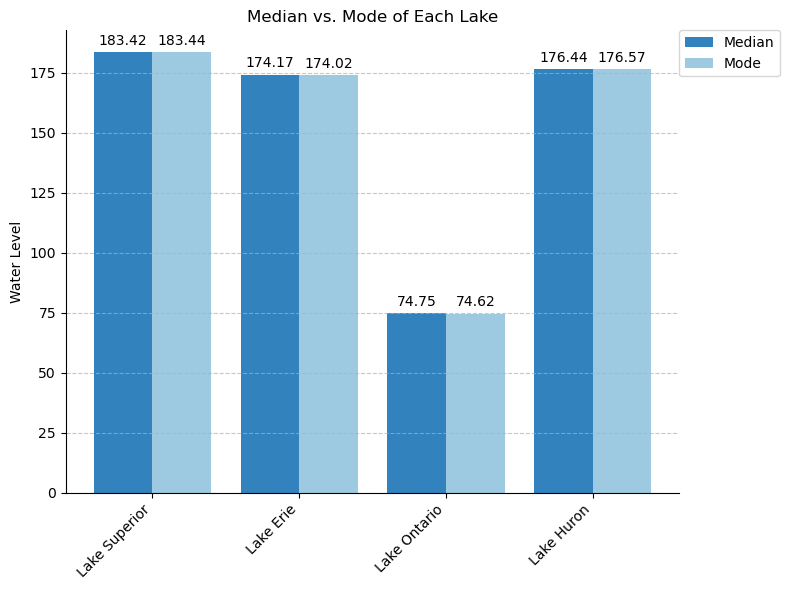

In [28]:
from scipy import stats

lake_names = []
lake_medians = []
lake_modes = []

# Extract data for each lake 
for (lake_name, date, level, color, mean_val, median_val, std_val) in lakes_data:
    lake_names.append(lake_name)
    
    lake_medians.append(median_val)
    
#Compute the mode using scipy.stats
    mode_result = stats.mode(level, keepdims=True)
    mode_val = mode_result.mode[0]
    lake_modes.append(mode_val)

#Formatting for side bars 
x_positions = np.arange(len(lake_names))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(8, 6))
fig.subplots_adjust(right=0.75)

#Color Palette 
median_color = "#3182bd" 
mode_color   = "#9ecae1"  

# Plot medians
bars_median = ax.bar(
    x_positions - bar_width/2,
    lake_medians,
    width=bar_width,
    color=median_color,
    label='Median'
)

# Plot modes
bars_mode = ax.bar(
    x_positions + bar_width/2,
    lake_modes,
    width=bar_width,
    color=mode_color,
    label='Mode'
)

# Add x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(lake_names, rotation=45, ha='right')

# Label axes & title
ax.set_ylabel('Water Level')
ax.set_title('Median vs. Mode of Each Lake')

#Data Labels 
ax.bar_label(bars_median, fmt="%.2f", padding=3)
ax.bar_label(bars_mode,   fmt="%.2f", padding=3)

#Formatting 
ax.legend(loc='upper left', bbox_to_anchor=(1,1), borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a faint grid along the y-axis
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
